This notebook contains code to build a neural network for BIOSTAT707 Final Project done by Jackson Dial

In [85]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
# import shap
import pandas as pd

In [87]:
#MLP
n_features = 168
model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)), 
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), 
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 84)                14196     
                                                                 
 drop1 (Dropout)             (None, 84)                0         
                                                                 
 h2 (Dense)                  (None, 42)                3570      
                                                                 
 drop2 (Dropout)             (None, 42)                0         
                                                                 
 output (Dense)              (None, 1)                 43        
                                                                 
Total params: 17,809
Trainable params: 17,809
Non-trainable params: 0
_________________________________________________________________


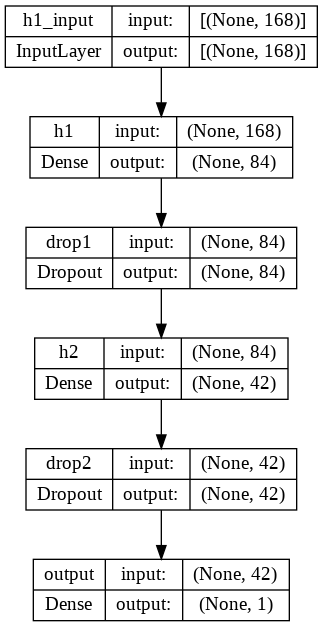

In [88]:
#try this to show the structure of the model but mine may be too complicated
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [89]:
# define metrics
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the neural network
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy',F1])

In [90]:
train = pd.read_csv("train_recode.csv")
test = pd.read_csv("test_recode.csv")

In [91]:
train.head()

,Unnamed: 0,subjid,ALP_1,ALP_2,ALP_3,ALP_4,ALT_1,ALT_2,ALT_3,ALT_4,...,pH_4,height_cleaned_1,height_cleaned_2,height_cleaned_3,height_cleaned_4,MechVent_cleaned_1,MechVent_cleaned_2,MechVent_cleaned_3,MechVent_cleaned_4,In.hospital_death
0,1,132547,NaN,101.0,101.0,101.0,45.000000,47.647059,60.0,60.0,...,7.448125,180.3,180.3,180.3,180.3,1.0,1.00,1.0,1.0,0
1,2,132551,47.0,47.0,47.0,47.0,46.000000,46.000000,46.0,46.0,...,7.343333,162.6,162.6,162.6,162.6,0.0,0.68,1.0,1.0,1
2,3,132567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.410000,157.5,157.5,157.5,157.5,1.0,1.00,1.0,1.0,0
3,4,132599,116.0,112.0,112.0,112.0,13.133333,13.000000,13.0,13.0,...,7.465625,177.8,177.8,177.8,177.8,1.0,1.00,1.0,1.0,0
4,5,132601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.420000,177.8,177.8,177.8,177.8,1.0,1.00,1.0,1.0,0


In [92]:
train.shape

(1270, 171)

In [93]:
#Replace NaN values with -1
train_neg1 = train.fillna(-1)

In [94]:
train_x_unnamed = train_neg1.drop(["subjid", "In.hospital_death"], axis=1)
train_x = train_x_unnamed.iloc[: , 1:]
train_y = train_neg1["In.hospital_death"]

In [95]:
train_x.isnull().any()

ALP_1                 False
ALP_2                 False
ALP_3                 False
ALP_4                 False
ALT_1                 False
                      ...  
height_cleaned_4      False
MechVent_cleaned_1    False
MechVent_cleaned_2    False
MechVent_cleaned_3    False
MechVent_cleaned_4    False
Length: 168, dtype: bool

In [96]:
train_x.shape
train_x.head()

,ALP_1,ALP_2,ALP_3,ALP_4,ALT_1,ALT_2,ALT_3,ALT_4,AST_1,AST_2,...,pH_3,pH_4,height_cleaned_1,height_cleaned_2,height_cleaned_3,height_cleaned_4,MechVent_cleaned_1,MechVent_cleaned_2,MechVent_cleaned_3,MechVent_cleaned_4
0,-1.0,101.0,101.0,101.0,45.000000,47.647059,60.0,60.0,47.0,67.294118,...,7.426667,7.448125,180.3,180.3,180.3,180.3,1.0,1.00,1.0,1.0
1,47.0,47.0,47.0,47.0,46.000000,46.000000,46.0,46.0,82.0,82.000000,...,7.267727,7.343333,162.6,162.6,162.6,162.6,0.0,0.68,1.0,1.0
2,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,...,7.410000,7.410000,157.5,157.5,157.5,157.5,1.0,1.00,1.0,1.0
3,116.0,112.0,112.0,112.0,13.133333,13.000000,13.0,13.0,19.4,20.000000,...,7.505625,7.465625,177.8,177.8,177.8,177.8,1.0,1.00,1.0,1.0
4,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,...,7.400714,7.420000,177.8,177.8,177.8,177.8,1.0,1.00,1.0,1.0


In [97]:
# model.fit(x = train_x, y = train_y, epochs = 100, validation_split = .3, verbose = 1)

Epoch 1/100
28/28 [==============================] - 1s 14ms/step - loss: 17.2341 - accuracy: 0.7278 - F1: 0.1211 - val_loss: 2.8987 - val_accuracy: 0.8609 - val_F1: 0.2324
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 6.9851 - accuracy: 0.7840 - F1: 0.2522 - val_loss: 2.4068 - val_accuracy: 0.8740 - val_F1: 0.2198
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 4.2945 - accuracy: 0.7953 - F1: 0.2439 - val_loss: 1.9542 - val_accuracy: 0.8845 - val_F1: 0.2081
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 5.1109 - accuracy: 0.7818 - F1: 0.2689 - val_loss: 1.8659 - val_accuracy: 0.8793 - val_F1: 0.2393
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 2.8113 - accuracy: 0.7975 - F1: 0.2625 - val_loss: 1.3283 - val_accuracy: 0.8688 - val_F1: 0.1544
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 2.5101 - accuracy: 0.8043 - F1: 0.2810 - val_loss: 1.6480 - val_accura

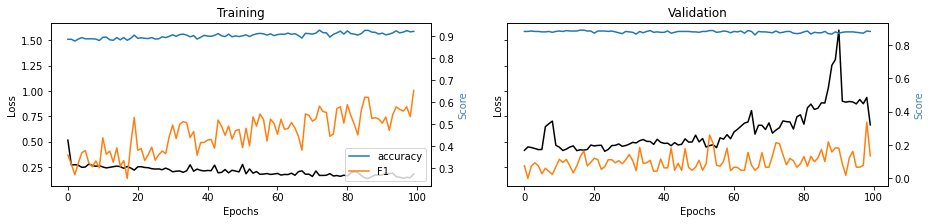

In [98]:
# train/validation
training = model.fit(x=train_x, y=train_y, batch_size=32, epochs=100, shuffle=True, verbose=0, validation_split=0.3)

# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]    
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
       
## training    
ax[0].set(title="Training")    
ax11 = ax[0].twinx()    
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')    
ax[0].set_ylabel('Loss', color='black')    
for metric in metrics:        
    ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')    
ax11.legend()
        
## validation    
ax[1].set(title="Validation")    
ax22 = ax[1].twinx()    
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')    
ax[1].set_ylabel('Loss', color='black')    
for metric in metrics:          
    ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")    
plt.show()

# Test

In [99]:
test.shape

(545, 171)

In [103]:
test_neg1 = test.fillna(-1)
test_x_unnamed = test_neg1.drop(["subjid", "In.hospital_death"], axis=1)
test_x = test_x_unnamed.iloc[: , 1:]
test_y = test_neg1["In.hospital_death"]
test_x.isnull().any()

ALP_1                 False
ALP_2                 False
ALP_3                 False
ALP_4                 False
ALT_1                 False
                      ...  
height_cleaned_4      False
MechVent_cleaned_1    False
MechVent_cleaned_2    False
MechVent_cleaned_3    False
MechVent_cleaned_4    False
Length: 168, dtype: bool

In [101]:
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import seaborn as sns

In [104]:
predictions_NN_prob = model.predict(test_x)
predictions_NN_prob = predictions_NN_prob[:,0]
# use 0.13 as threshold because that is the approximate prevalence in the data of death
predictions_NN_01 = np.where(predictions_NN_prob > 0.13, 1, 0) #Turn probability to 0-1 binary output

18/18 [==============================] - 0s 2ms/step


In [105]:
acc_NN = accuracy_score(test_y, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.7743119266055046


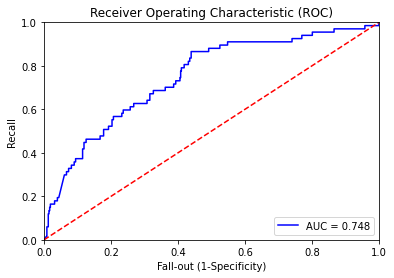

In [106]:
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

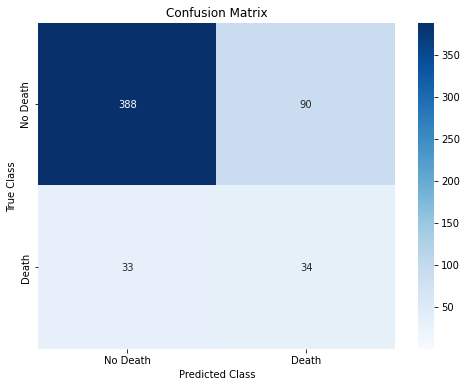

In [107]:
cm = confusion_matrix(test_y, predictions_NN_01)
labels = ['No Death', 'Death']
plt.figure(figsize=(8,6))
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## Precision Recall Curve

In [108]:
from sklearn.metrics import precision_recall_curve

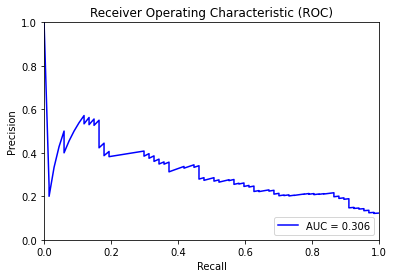

In [109]:
precision, recall, thresholds = precision_recall_curve(test_y, predictions_NN_prob)
prc_auc = auc(recall, precision)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(recall, precision, 'b', label = 'AUC = %0.3f' %prc_auc)
plt.legend(loc='lower right')
# plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()